In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '2'

from encoding_information.gpu_utils import limit_gpu_memory_growth  
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from signal_utils_1D import *
from plot_utils_1D import *

/home/hpinkard_waller/mambaforge/envs/phenotypes/lib/python3.10/site-packages/jax/_src/api_util.py:172: SyntaxWarning: Jitted function has static_argnums=(1,), but only accepts 1 positional arguments. This warning will be replaced by an error after 2022-08-20 at the earliest.
  warnings.warn(f"Jitted function has {argnums_name}={argnums}, "


## Generate many objects in parallel

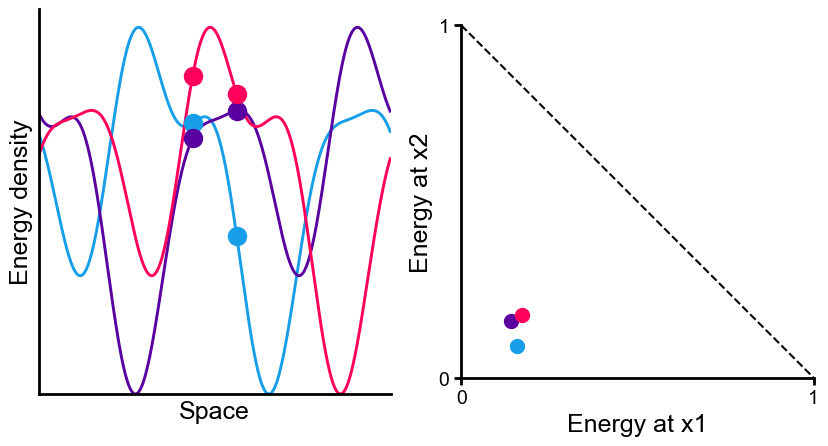

In [3]:
num_nyquist_samples = 8

n_objects = 20
objects = np.array([generate_random_object('delta') for i in range(n_objects)])

# generate random convolution kernel
random_kernel = signal_from_params(generate_params_of_random_signal(num_nyquist_samples=num_nyquist_samples))
conv_mat = make_convolutional_encoder(random_kernel)

output_signals = objects @ conv_mat.T 


sampling_indices = (3, 4)
num_to_plot = 3

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_in_spatial_coordinates(ax[0], output_signals[:num_to_plot], sampling_indices=sampling_indices)
plot_in_intensity_coordinates(ax[1], output_signals[:num_to_plot], sampling_indices=sampling_indices, plot_signals_in_different_colors=True)

## 2D plot of space mapped to by single delta function vs multiple

In [22]:
sampling_indices = (3, 4)

grid_density = 12

objects = [generate_random_object('delta', num_deltas=1), 
                 generate_random_object('delta', num_deltas=2),
                    generate_random_object('delta', num_deltas=8)]
labels = ['1 peak', '2 peaks', '8 peaks']


target_integrated_signals = make_intensity_coordinate_sampling_grid(sampling_indices, sample_n=grid_density, num_nyquist_samples=num_nyquist_samples)

sets_of_output_signals = []
initial_kernel = signal_from_params(generate_params_of_random_signal(num_nyquist_samples=num_nyquist_samples))
for object in objects:
    optimized_kernels, output_signals = optimize_towards_target_signals(target_integrated_signals, object, initial_kernel, sampling_indices=sampling_indices, verbose=True)
    sets_of_output_signals.append(output_signals)


  0%|          | 0/78 [00:00<?, ?it/s]

initial loss 0.04242845


  1%|▏         | 1/78 [00:19<25:07, 19.58s/it]

initial loss 0.016495945


  3%|▎         | 2/78 [00:45<29:40, 23.43s/it]

initial loss 0.007092367


  4%|▍         | 3/78 [01:15<32:45, 26.20s/it]

initial loss 0.014217715


  5%|▌         | 4/78 [01:48<35:40, 28.93s/it]

initial loss 0.03787199


  6%|▋         | 5/78 [02:24<38:24, 31.57s/it]

initial loss 0.07805519


  8%|▊         | 6/78 [03:08<42:53, 35.74s/it]

initial loss 0.13476732


  9%|▉         | 7/78 [03:39<40:38, 34.35s/it]

initial loss 0.20800835


 10%|█         | 8/78 [03:51<31:30, 27.00s/it]

initial loss 0.29777837


 12%|█▏        | 9/78 [04:27<34:22, 29.89s/it]

initial loss 0.40407732


 13%|█▎        | 10/78 [04:37<26:56, 23.77s/it]

initial loss 0.52690506


 14%|█▍        | 11/78 [04:49<22:24, 20.06s/it]

initial loss 0.66626185


 15%|█▌        | 12/78 [05:30<29:05, 26.45s/it]

initial loss 0.03542331


 17%|█▋        | 13/78 [05:59<29:29, 27.22s/it]

initial loss 0.009490804


 18%|█▊        | 14/78 [06:14<25:04, 23.51s/it]

initial loss 8.72251e-05


 19%|█▉        | 15/78 [06:27<21:25, 20.40s/it]

initial loss 0.007212573


 21%|██        | 16/78 [06:41<19:14, 18.62s/it]

initial loss 0.030866846


 22%|██▏       | 17/78 [06:56<17:42, 17.43s/it]

initial loss 0.07105005


 23%|██▎       | 18/78 [07:11<16:36, 16.61s/it]

initial loss 0.12776217


 24%|██▍       | 19/78 [07:32<17:51, 18.17s/it]

initial loss 0.2010032


 26%|██▌       | 20/78 [08:07<22:11, 22.96s/it]

initial loss 0.29077324


 27%|██▋       | 21/78 [08:49<27:25, 28.86s/it]

initial loss 0.3970722


 28%|██▊       | 22/78 [09:09<24:30, 26.26s/it]

initial loss 0.5198999


 29%|██▉       | 23/78 [09:22<20:18, 22.16s/it]

initial loss 0.04494709


 31%|███       | 24/78 [09:50<21:29, 23.88s/it]

initial loss 0.01901459


 32%|███▏      | 25/78 [10:04<18:24, 20.85s/it]

initial loss 0.00961101


 33%|███▎      | 26/78 [10:18<16:22, 18.90s/it]

initial loss 0.016736358


 35%|███▍      | 27/78 [10:32<14:47, 17.41s/it]

initial loss 0.040390633


 36%|███▌      | 28/78 [10:46<13:42, 16.44s/it]

initial loss 0.080573834


 37%|███▋      | 29/78 [11:00<12:54, 15.80s/it]

initial loss 0.13728596


 38%|███▊      | 30/78 [11:15<12:14, 15.31s/it]

initial loss 0.21052699


 40%|███▉      | 31/78 [11:56<18:03, 23.05s/it]

initial loss 0.30029702


 41%|████      | 32/78 [12:38<22:02, 28.75s/it]

initial loss 0.40659598


 42%|████▏     | 33/78 [13:04<21:02, 28.05s/it]

initial loss 0.0709998


 44%|████▎     | 34/78 [13:39<21:58, 29.96s/it]

initial loss 0.045067303


 45%|████▍     | 35/78 [13:53<18:03, 25.20s/it]

initial loss 0.035663724


 46%|████▌     | 36/78 [14:06<15:11, 21.69s/it]

initial loss 0.04278907


 47%|████▋     | 37/78 [14:21<13:21, 19.56s/it]

initial loss 0.06644335


 49%|████▊     | 38/78 [14:35<11:55, 17.89s/it]

initial loss 0.10662654


 50%|█████     | 39/78 [14:49<10:53, 16.77s/it]

initial loss 0.16333868


 51%|█████▏    | 40/78 [15:10<11:25, 18.04s/it]

initial loss 0.2365797


 53%|█████▎    | 41/78 [15:51<15:23, 24.95s/it]

initial loss 0.32634974


 54%|█████▍    | 42/78 [16:40<19:16, 32.13s/it]

initial loss 0.11358144


 55%|█████▌    | 43/78 [17:15<19:15, 33.01s/it]

initial loss 0.087648936


 56%|█████▋    | 44/78 [17:30<15:36, 27.56s/it]

initial loss 0.07824536


 58%|█████▊    | 45/78 [17:44<12:58, 23.60s/it]

initial loss 0.085370705


 59%|█████▉    | 46/78 [17:59<11:07, 20.87s/it]

initial loss 0.10902498


 60%|██████    | 47/78 [18:13<09:45, 18.87s/it]

initial loss 0.14920819


 62%|██████▏   | 48/78 [18:27<08:46, 17.56s/it]

initial loss 0.20592031


 63%|██████▎   | 49/78 [19:04<11:13, 23.22s/it]

initial loss 0.27916133


 64%|██████▍   | 50/78 [19:19<09:43, 20.85s/it]

initial loss 0.172692


 65%|██████▌   | 51/78 [20:00<12:09, 27.01s/it]

initial loss 0.14675951


 67%|██████▋   | 52/78 [20:15<10:05, 23.31s/it]

initial loss 0.13735592


 68%|██████▊   | 53/78 [20:29<08:35, 20.61s/it]

initial loss 0.14448127


 69%|██████▉   | 54/78 [20:44<07:29, 18.73s/it]

initial loss 0.16813555


 71%|███████   | 55/78 [20:58<06:42, 17.49s/it]

initial loss 0.20831874


 72%|███████▏  | 56/78 [21:28<07:46, 21.21s/it]

initial loss 0.26503086


 73%|███████▎  | 57/78 [21:59<08:22, 23.94s/it]

initial loss 0.24833149


 74%|███████▍  | 58/78 [22:34<09:06, 27.35s/it]

initial loss 0.222399


 76%|███████▌  | 59/78 [23:01<08:37, 27.25s/it]

initial loss 0.21299541


 77%|███████▋  | 60/78 [23:19<07:19, 24.44s/it]

initial loss 0.22012076


 78%|███████▊  | 61/78 [23:35<06:14, 22.01s/it]

initial loss 0.24377504


 79%|███████▉  | 62/78 [24:07<06:40, 25.00s/it]

initial loss 0.28395823


 81%|████████  | 63/78 [24:38<06:41, 26.78s/it]

initial loss 0.34049988


 82%|████████▏ | 64/78 [25:02<06:04, 26.05s/it]

initial loss 0.3145674


 83%|████████▎ | 65/78 [25:23<05:17, 24.45s/it]

initial loss 0.3051638


 85%|████████▍ | 66/78 [26:15<06:32, 32.74s/it]

initial loss 0.31228915


 86%|████████▌ | 67/78 [26:31<05:02, 27.52s/it]

initial loss 0.33594343


 87%|████████▋ | 68/78 [26:55<04:26, 26.61s/it]

initial loss 0.44919726


 88%|████████▊ | 69/78 [27:11<03:31, 23.46s/it]

initial loss 0.42326477


 90%|████████▉ | 70/78 [27:43<03:27, 25.99s/it]

initial loss 0.4138612


 91%|█████████ | 71/78 [28:21<03:27, 29.67s/it]

initial loss 0.42098653


 92%|█████████▏| 72/78 [28:38<02:33, 25.64s/it]

initial loss 0.5744236


 94%|█████████▎| 73/78 [28:48<01:44, 20.97s/it]

initial loss 0.54849106


 95%|█████████▍| 74/78 [29:27<01:45, 26.47s/it]

initial loss 0.53908753


 96%|█████████▌| 75/78 [30:01<01:26, 28.81s/it]

initial loss 0.7161788


 97%|█████████▋| 76/78 [30:11<00:46, 23.24s/it]

initial loss 0.6902462


 99%|█████████▊| 77/78 [30:58<00:30, 30.28s/it]

initial loss 0.87446284


100%|██████████| 78/78 [32:09<00:00, 24.74s/it]


  0%|          | 0/78 [00:00<?, ?it/s]

initial loss 0.026563767


  1%|▏         | 1/78 [00:32<42:07, 32.82s/it]

initial loss 0.018730719


  3%|▎         | 2/78 [01:05<41:39, 32.88s/it]

initial loss 0.027426593


  4%|▍         | 3/78 [01:41<42:34, 34.06s/it]

initial loss 0.052651398


  5%|▌         | 4/78 [02:18<43:32, 35.30s/it]

initial loss 0.09440513


  6%|▋         | 5/78 [02:53<42:50, 35.21s/it]

initial loss 0.15268777


  8%|▊         | 6/78 [03:30<43:10, 35.97s/it]

initial loss 0.22749937


  9%|▉         | 7/78 [04:06<42:32, 35.95s/it]

initial loss 0.31883985


 10%|█         | 8/78 [04:55<46:49, 40.14s/it]

initial loss 0.42670932


 12%|█▏        | 9/78 [05:37<46:33, 40.49s/it]

initial loss 0.5511077


 13%|█▎        | 10/78 [06:26<48:56, 43.19s/it]

initial loss 0.69203496


 14%|█▍        | 11/78 [07:20<51:53, 46.48s/it]

initial loss 0.8494911


 15%|█▌        | 12/78 [07:49<45:27, 41.33s/it]

initial loss 0.009948296


 17%|█▋        | 13/78 [08:21<41:37, 38.42s/it]

initial loss 0.0021152454


 18%|█▊        | 14/78 [08:35<33:10, 31.11s/it]

initial loss 0.010811121


 19%|█▉        | 15/78 [08:51<27:47, 26.47s/it]

initial loss 0.036035925


 21%|██        | 16/78 [09:25<29:40, 28.72s/it]

initial loss 0.07778966


 22%|██▏       | 17/78 [10:02<31:35, 31.07s/it]

initial loss 0.13607231


 23%|██▎       | 18/78 [10:38<32:32, 32.54s/it]

initial loss 0.2108839


 24%|██▍       | 19/78 [11:24<36:14, 36.86s/it]

initial loss 0.30222437


 26%|██▌       | 20/78 [12:17<40:10, 41.57s/it]

initial loss 0.41009384


 27%|██▋       | 21/78 [12:47<36:08, 38.05s/it]

initial loss 0.5344922


 28%|██▊       | 22/78 [13:36<38:40, 41.43s/it]

initial loss 0.67541945


 29%|██▉       | 23/78 [14:33<42:13, 46.06s/it]

initial loss 0.00986175


 31%|███       | 24/78 [15:16<40:39, 45.17s/it]

initial loss 0.0020286995


 32%|███▏      | 25/78 [15:31<31:49, 36.03s/it]

initial loss 0.010724575


 33%|███▎      | 26/78 [15:46<25:49, 29.79s/it]

initial loss 0.03594938


 35%|███▍      | 27/78 [16:08<23:26, 27.57s/it]

initial loss 0.07770311


 36%|███▌      | 28/78 [16:48<25:57, 31.16s/it]

initial loss 0.13598576


 37%|███▋      | 29/78 [17:32<28:32, 34.95s/it]

initial loss 0.21079735


 38%|███▊      | 30/78 [18:28<33:05, 41.36s/it]

initial loss 0.30213782


 40%|███▉      | 31/78 [19:26<36:12, 46.23s/it]

initial loss 0.4100073


 41%|████      | 32/78 [20:23<38:05, 49.68s/it]

initial loss 0.53440565


 42%|████▏     | 33/78 [20:55<33:06, 44.15s/it]

initial loss 0.02630413


 44%|████▎     | 34/78 [21:38<32:06, 43.79s/it]

initial loss 0.01847108


 45%|████▍     | 35/78 [22:08<28:26, 39.69s/it]

initial loss 0.027166955


 46%|████▌     | 36/78 [22:30<24:10, 34.53s/it]

initial loss 0.05239176


 47%|████▋     | 37/78 [22:54<21:20, 31.24s/it]

initial loss 0.09414549


 49%|████▊     | 38/78 [23:24<20:39, 30.98s/it]

initial loss 0.15242814


 50%|█████     | 39/78 [24:08<22:33, 34.72s/it]

initial loss 0.22723973


 51%|█████▏    | 40/78 [24:58<25:03, 39.55s/it]

initial loss 0.3185802


 53%|█████▎    | 41/78 [25:56<27:46, 45.04s/it]

initial loss 0.4264497


 54%|█████▍    | 42/78 [26:47<27:58, 46.64s/it]

initial loss 0.059275437


 55%|█████▌    | 43/78 [27:38<27:57, 47.93s/it]

initial loss 0.051442385


 56%|█████▋    | 44/78 [28:15<25:20, 44.72s/it]

initial loss 0.060138263


 58%|█████▊    | 45/78 [28:51<23:15, 42.28s/it]

initial loss 0.08536306


 59%|█████▉    | 46/78 [29:35<22:49, 42.78s/it]

initial loss 0.1271168


 60%|██████    | 47/78 [30:28<23:39, 45.79s/it]

initial loss 0.18539944


 62%|██████▏   | 48/78 [31:21<23:55, 47.85s/it]

initial loss 0.26021105


 63%|██████▎   | 49/78 [32:09<23:09, 47.92s/it]

initial loss 0.3515515


 64%|██████▍   | 50/78 [33:04<23:23, 50.12s/it]

initial loss 0.10877566


 65%|██████▌   | 51/78 [33:53<22:20, 49.66s/it]

initial loss 0.10094261


 67%|██████▋   | 52/78 [34:41<21:20, 49.24s/it]

initial loss 0.10963848


 68%|██████▊   | 53/78 [35:25<19:49, 47.57s/it]

initial loss 0.13486329


 69%|██████▉   | 54/78 [36:14<19:15, 48.17s/it]

initial loss 0.17661703


 71%|███████   | 55/78 [37:03<18:31, 48.32s/it]

initial loss 0.23489967


 72%|███████▏  | 56/78 [37:53<17:57, 48.98s/it]

initial loss 0.30971128


 73%|███████▎  | 57/78 [38:49<17:52, 51.08s/it]

initial loss 0.17480485


 74%|███████▍  | 58/78 [39:45<17:29, 52.45s/it]

initial loss 0.1669718


 76%|███████▌  | 59/78 [40:36<16:26, 51.90s/it]

initial loss 0.17566767


 77%|███████▋  | 60/78 [41:25<15:23, 51.28s/it]

initial loss 0.20089248


 78%|███████▊  | 61/78 [42:15<14:23, 50.79s/it]

initial loss 0.24264622


 79%|███████▉  | 62/78 [43:04<13:23, 50.20s/it]

initial loss 0.30092886


 81%|████████  | 63/78 [44:00<13:01, 52.10s/it]

initial loss 0.2573629


 82%|████████▏ | 64/78 [44:57<12:26, 53.30s/it]

initial loss 0.24952985


 83%|████████▎ | 65/78 [45:51<11:36, 53.61s/it]

initial loss 0.25822574


 85%|████████▍ | 66/78 [46:45<10:45, 53.76s/it]

initial loss 0.28345054


 86%|████████▌ | 67/78 [47:41<09:57, 54.34s/it]

initial loss 0.32520425


 87%|████████▋ | 68/78 [48:35<09:04, 54.40s/it]

initial loss 0.35644993


 88%|████████▊ | 69/78 [49:34<08:21, 55.68s/it]

initial loss 0.3486169


 90%|████████▉ | 70/78 [50:38<07:46, 58.30s/it]

initial loss 0.35731277


 91%|█████████ | 71/78 [51:35<06:44, 57.85s/it]

initial loss 0.38253757


 92%|█████████▏| 72/78 [52:26<05:34, 55.75s/it]

initial loss 0.47206593


 94%|█████████▎| 73/78 [53:23<04:40, 56.08s/it]

initial loss 0.4642329


 95%|█████████▍| 74/78 [54:19<03:44, 56.22s/it]

initial loss 0.47292876


 96%|█████████▌| 75/78 [55:09<02:42, 54.33s/it]

initial loss 0.60421073


 97%|█████████▋| 76/78 [56:06<01:49, 54.94s/it]

initial loss 0.5963777


 99%|█████████▊| 77/78 [56:56<00:53, 53.52s/it]

initial loss 0.7528845


  0%|          | 0/78 [00:00<?, ?it/s]

initial loss 0.01987045


  1%|▏         | 1/78 [00:37<48:22, 37.70s/it]

initial loss 0.008098739


  3%|▎         | 2/78 [01:03<38:36, 30.48s/it]

initial loss 0.012855954


  4%|▍         | 3/78 [01:28<35:03, 28.05s/it]

initial loss 0.034142096


  5%|▌         | 4/78 [01:59<36:17, 29.42s/it]

initial loss 0.071957156


  6%|▋         | 5/78 [02:37<39:19, 32.33s/it]

initial loss 0.12630117


  8%|▊         | 6/78 [03:15<41:05, 34.24s/it]

initial loss 0.19717407


  9%|▉         | 7/78 [03:59<44:18, 37.45s/it]

initial loss 0.28457588


 10%|█         | 8/78 [04:50<48:38, 41.70s/it]

initial loss 0.38850668


 12%|█▏        | 9/78 [05:40<51:05, 44.43s/it]

initial loss 0.50896645


 13%|█▎        | 10/78 [06:30<52:27, 46.29s/it]

initial loss 0.645955


 14%|█▍        | 11/78 [07:20<52:48, 47.29s/it]

initial loss 0.7994725


 15%|█▌        | 12/78 [08:17<55:13, 50.20s/it]

initial loss 0.012152857


 17%|█▋        | 13/78 [09:07<54:26, 50.25s/it]

initial loss 0.0003811457


 18%|█▊        | 14/78 [09:29<44:29, 41.72s/it]

initial loss 0.0051383604


 19%|█▉        | 15/78 [10:06<42:04, 40.08s/it]

initial loss 0.026424503


 21%|██        | 16/78 [10:48<42:18, 40.94s/it]

initial loss 0.06423956


 22%|██▏       | 17/78 [11:39<44:40, 43.95s/it]

initial loss 0.118583575


 23%|██▎       | 18/78 [12:29<45:42, 45.71s/it]

initial loss 0.18945648


 24%|██▍       | 19/78 [13:19<46:15, 47.04s/it]

initial loss 0.2768583


 26%|██▌       | 20/78 [14:10<46:36, 48.22s/it]

initial loss 0.3807891


 27%|██▋       | 21/78 [15:01<46:35, 49.04s/it]

initial loss 0.50124884


 28%|██▊       | 22/78 [15:52<46:11, 49.49s/it]

initial loss 0.6382374


 29%|██▉       | 23/78 [16:43<45:46, 49.93s/it]

initial loss 0.02096419


 31%|███       | 24/78 [17:19<41:13, 45.81s/it]

initial loss 0.009192479


 32%|███▏      | 25/78 [17:56<38:01, 43.05s/it]

initial loss 0.013949694


 33%|███▎      | 26/78 [18:39<37:19, 43.06s/it]

initial loss 0.035235837


 35%|███▍      | 27/78 [19:29<38:21, 45.13s/it]

initial loss 0.073050894


 36%|███▌      | 28/78 [20:19<38:50, 46.61s/it]

initial loss 0.12739491


 37%|███▋      | 29/78 [21:10<39:10, 47.97s/it]

initial loss 0.19826782


 38%|███▊      | 30/78 [22:01<39:03, 48.83s/it]

initial loss 0.28566962


 40%|███▉      | 31/78 [22:51<38:29, 49.13s/it]

initial loss 0.38960043


 41%|████      | 32/78 [23:41<37:53, 49.43s/it]

initial loss 0.51006013


 42%|████▏     | 33/78 [24:35<38:09, 50.87s/it]

initial loss 0.04630445


 44%|████▎     | 34/78 [25:24<36:53, 50.32s/it]

initial loss 0.03453274


 45%|████▍     | 35/78 [26:15<36:08, 50.42s/it]

initial loss 0.039289955


 46%|████▌     | 36/78 [27:12<36:48, 52.59s/it]

initial loss 0.060576096


 47%|████▋     | 37/78 [27:56<34:05, 49.89s/it]

initial loss 0.09839116


 49%|████▊     | 38/78 [28:48<33:40, 50.52s/it]

initial loss 0.15273517


 50%|█████     | 39/78 [29:39<32:59, 50.76s/it]

initial loss 0.22360808


 51%|█████▏    | 40/78 [30:30<32:15, 50.94s/it]

initial loss 0.31100988


 53%|█████▎    | 41/78 [31:21<31:22, 50.88s/it]

initial loss 0.41494069


 54%|█████▍    | 42/78 [32:12<30:29, 50.82s/it]

initial loss 0.08817365


 55%|█████▌    | 43/78 [32:56<28:25, 48.73s/it]

initial loss 0.076401934


 56%|█████▋    | 44/78 [33:47<27:57, 49.34s/it]

initial loss 0.08115915


 58%|█████▊    | 45/78 [34:37<27:23, 49.81s/it]

initial loss 0.10244529


 59%|█████▉    | 46/78 [35:21<25:37, 48.04s/it]

initial loss 0.14026035


 60%|██████    | 47/78 [36:12<25:13, 48.81s/it]

initial loss 0.19460437


 62%|██████▏   | 48/78 [36:56<23:39, 47.31s/it]

initial loss 0.26547727


 63%|██████▎   | 49/78 [37:39<22:14, 46.03s/it]

initial loss 0.35287908


 64%|██████▍   | 50/78 [38:30<22:12, 47.60s/it]

initial loss 0.14657174


 65%|██████▌   | 51/78 [39:13<20:45, 46.13s/it]

initial loss 0.13480003


 67%|██████▋   | 52/78 [40:02<20:27, 47.20s/it]

initial loss 0.13955724


 68%|██████▊   | 53/78 [40:53<20:07, 48.28s/it]

initial loss 0.16084339


 69%|██████▉   | 54/78 [41:44<19:33, 48.91s/it]

initial loss 0.19865845


 71%|███████   | 55/78 [42:41<19:42, 51.42s/it]

initial loss 0.25300246


 72%|███████▏  | 56/78 [43:25<18:00, 49.10s/it]

initial loss 0.32387537


 73%|███████▎  | 57/78 [44:08<16:34, 47.36s/it]

initial loss 0.2214988


 74%|███████▍  | 58/78 [44:51<15:24, 46.20s/it]

initial loss 0.2097271


 76%|███████▌  | 59/78 [45:34<14:19, 45.26s/it]

initial loss 0.2144843


 77%|███████▋  | 60/78 [46:18<13:24, 44.67s/it]

initial loss 0.23577045


 78%|███████▊  | 61/78 [47:01<12:30, 44.17s/it]

initial loss 0.2735855


 79%|███████▉  | 62/78 [47:44<11:43, 44.00s/it]

initial loss 0.32792953


 81%|████████  | 63/78 [48:35<11:29, 45.94s/it]

initial loss 0.31295475


 82%|████████▏ | 64/78 [49:26<11:03, 47.37s/it]

initial loss 0.30118304


 83%|████████▎ | 65/78 [50:16<10:28, 48.38s/it]

initial loss 0.30594024


 85%|████████▍ | 66/78 [50:59<09:20, 46.68s/it]

initial loss 0.3272264


 86%|████████▌ | 67/78 [51:43<08:23, 45.77s/it]

initial loss 0.36504143


 87%|████████▋ | 68/78 [52:26<07:31, 45.13s/it]

initial loss 0.42093968


 88%|████████▊ | 69/78 [53:18<07:02, 46.98s/it]

initial loss 0.40916798


 90%|████████▉ | 70/78 [54:09<06:25, 48.18s/it]

initial loss 0.41392517


 91%|█████████ | 71/78 [54:59<05:41, 48.72s/it]

initial loss 0.43521133


 92%|█████████▏| 72/78 [55:49<04:55, 49.32s/it]

initial loss 0.5454535


 94%|█████████▎| 73/78 [56:41<04:10, 50.18s/it]

initial loss 0.5336818


 95%|█████████▍| 74/78 [57:31<03:20, 50.09s/it]

initial loss 0.53843904


 96%|█████████▌| 75/78 [58:23<02:31, 50.45s/it]

initial loss 0.6864962


 97%|█████████▋| 76/78 [59:13<01:41, 50.50s/it]

initial loss 0.6747245


 99%|█████████▊| 77/78 [1:00:05<00:50, 50.91s/it]

initial loss 0.8440678


100%|██████████| 78/78 [1:00:56<00:00, 46.88s/it]


/home/hpinkard_waller/mambaforge/envs/phenotypes/lib/python3.10/site-packages/jax/_src/api_util.py:172: SyntaxWarning: Jitted function has static_argnums=(1,), but only accepts 1 positional arguments. This warning will be replaced by an error after 2022-08-20 at the earliest.
  warnings.warn(f"Jitted function has {argnums_name}={argnums}, "


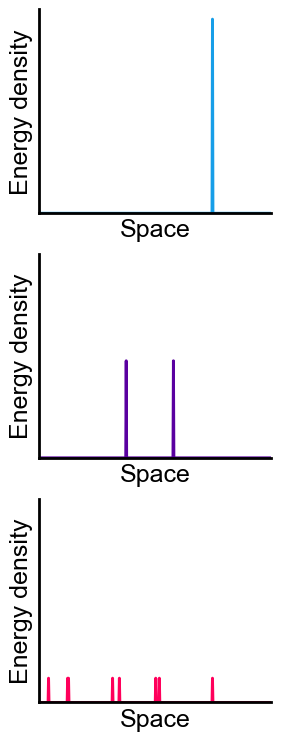

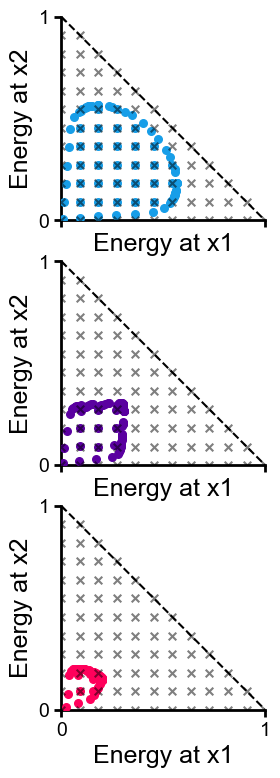

In [23]:
# make a 3x1 plot with shared x and y axes showing the input signals
fig, ax = plt.subplots(3, 1, figsize=(3, 9), sharex=True, sharey=True)
for i, (input_signal, label) in enumerate(zip(objects, labels)):
    plot_in_spatial_coordinates(ax[i], input_signal, show_samples=False, label=label, color=get_color_cycle()[i])

fig.savefig('/home/hpinkard_waller/figures/1d_signals/' + f'different_delta_objects' + '.pdf', transparent=True)

fig, ax = plt.subplots(3, 1, figsize=(3, 9), sharex=True, sharey=True)
for i, (output_signals, label) in enumerate(zip(sets_of_output_signals, labels)):
    plot_in_intensity_coordinates(ax[i], output_signals, label=label, sampling_indices=sampling_indices, color=get_color_cycle()[i])
    plot_in_intensity_coordinates(ax[i], target_integrated_signals, label='target signals',  marker='x', 
                                   sampling_indices=sampling_indices, color='k', alpha=0.5)

fig.savefig('/home/hpinkard_waller/figures/1d_signals/' + f'encoder_ranges' + '.pdf', transparent=True)